In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

In [2]:
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.shape

(4600, 18)

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

#### We can see that there are no mmissing values

In [6]:
sns.set()

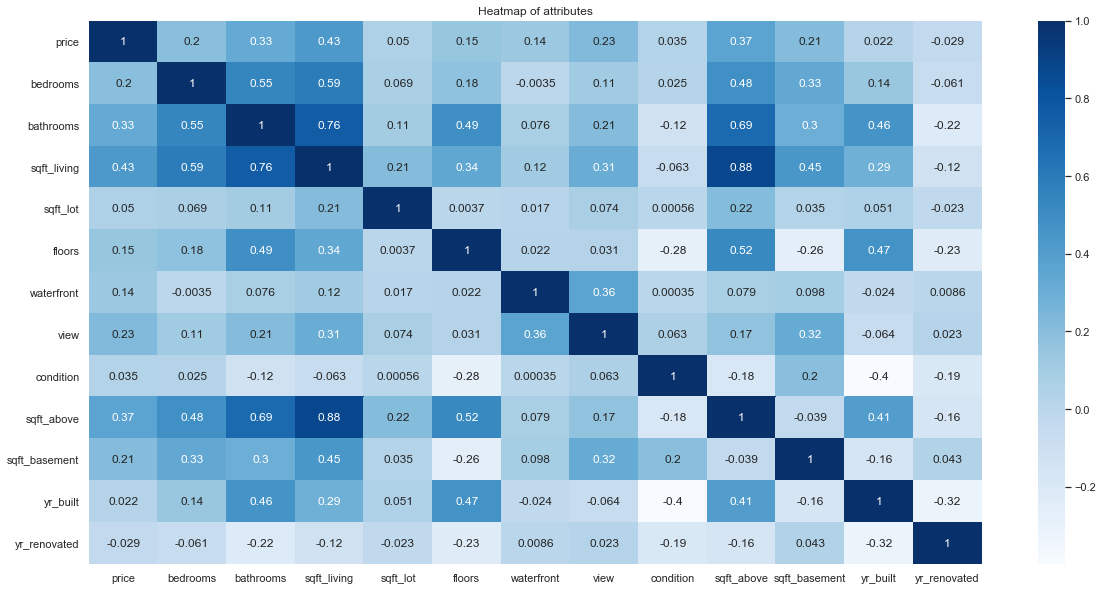

In [7]:
plt.figure(figsize=(20,10))
plt.title('Heatmap of attributes')
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

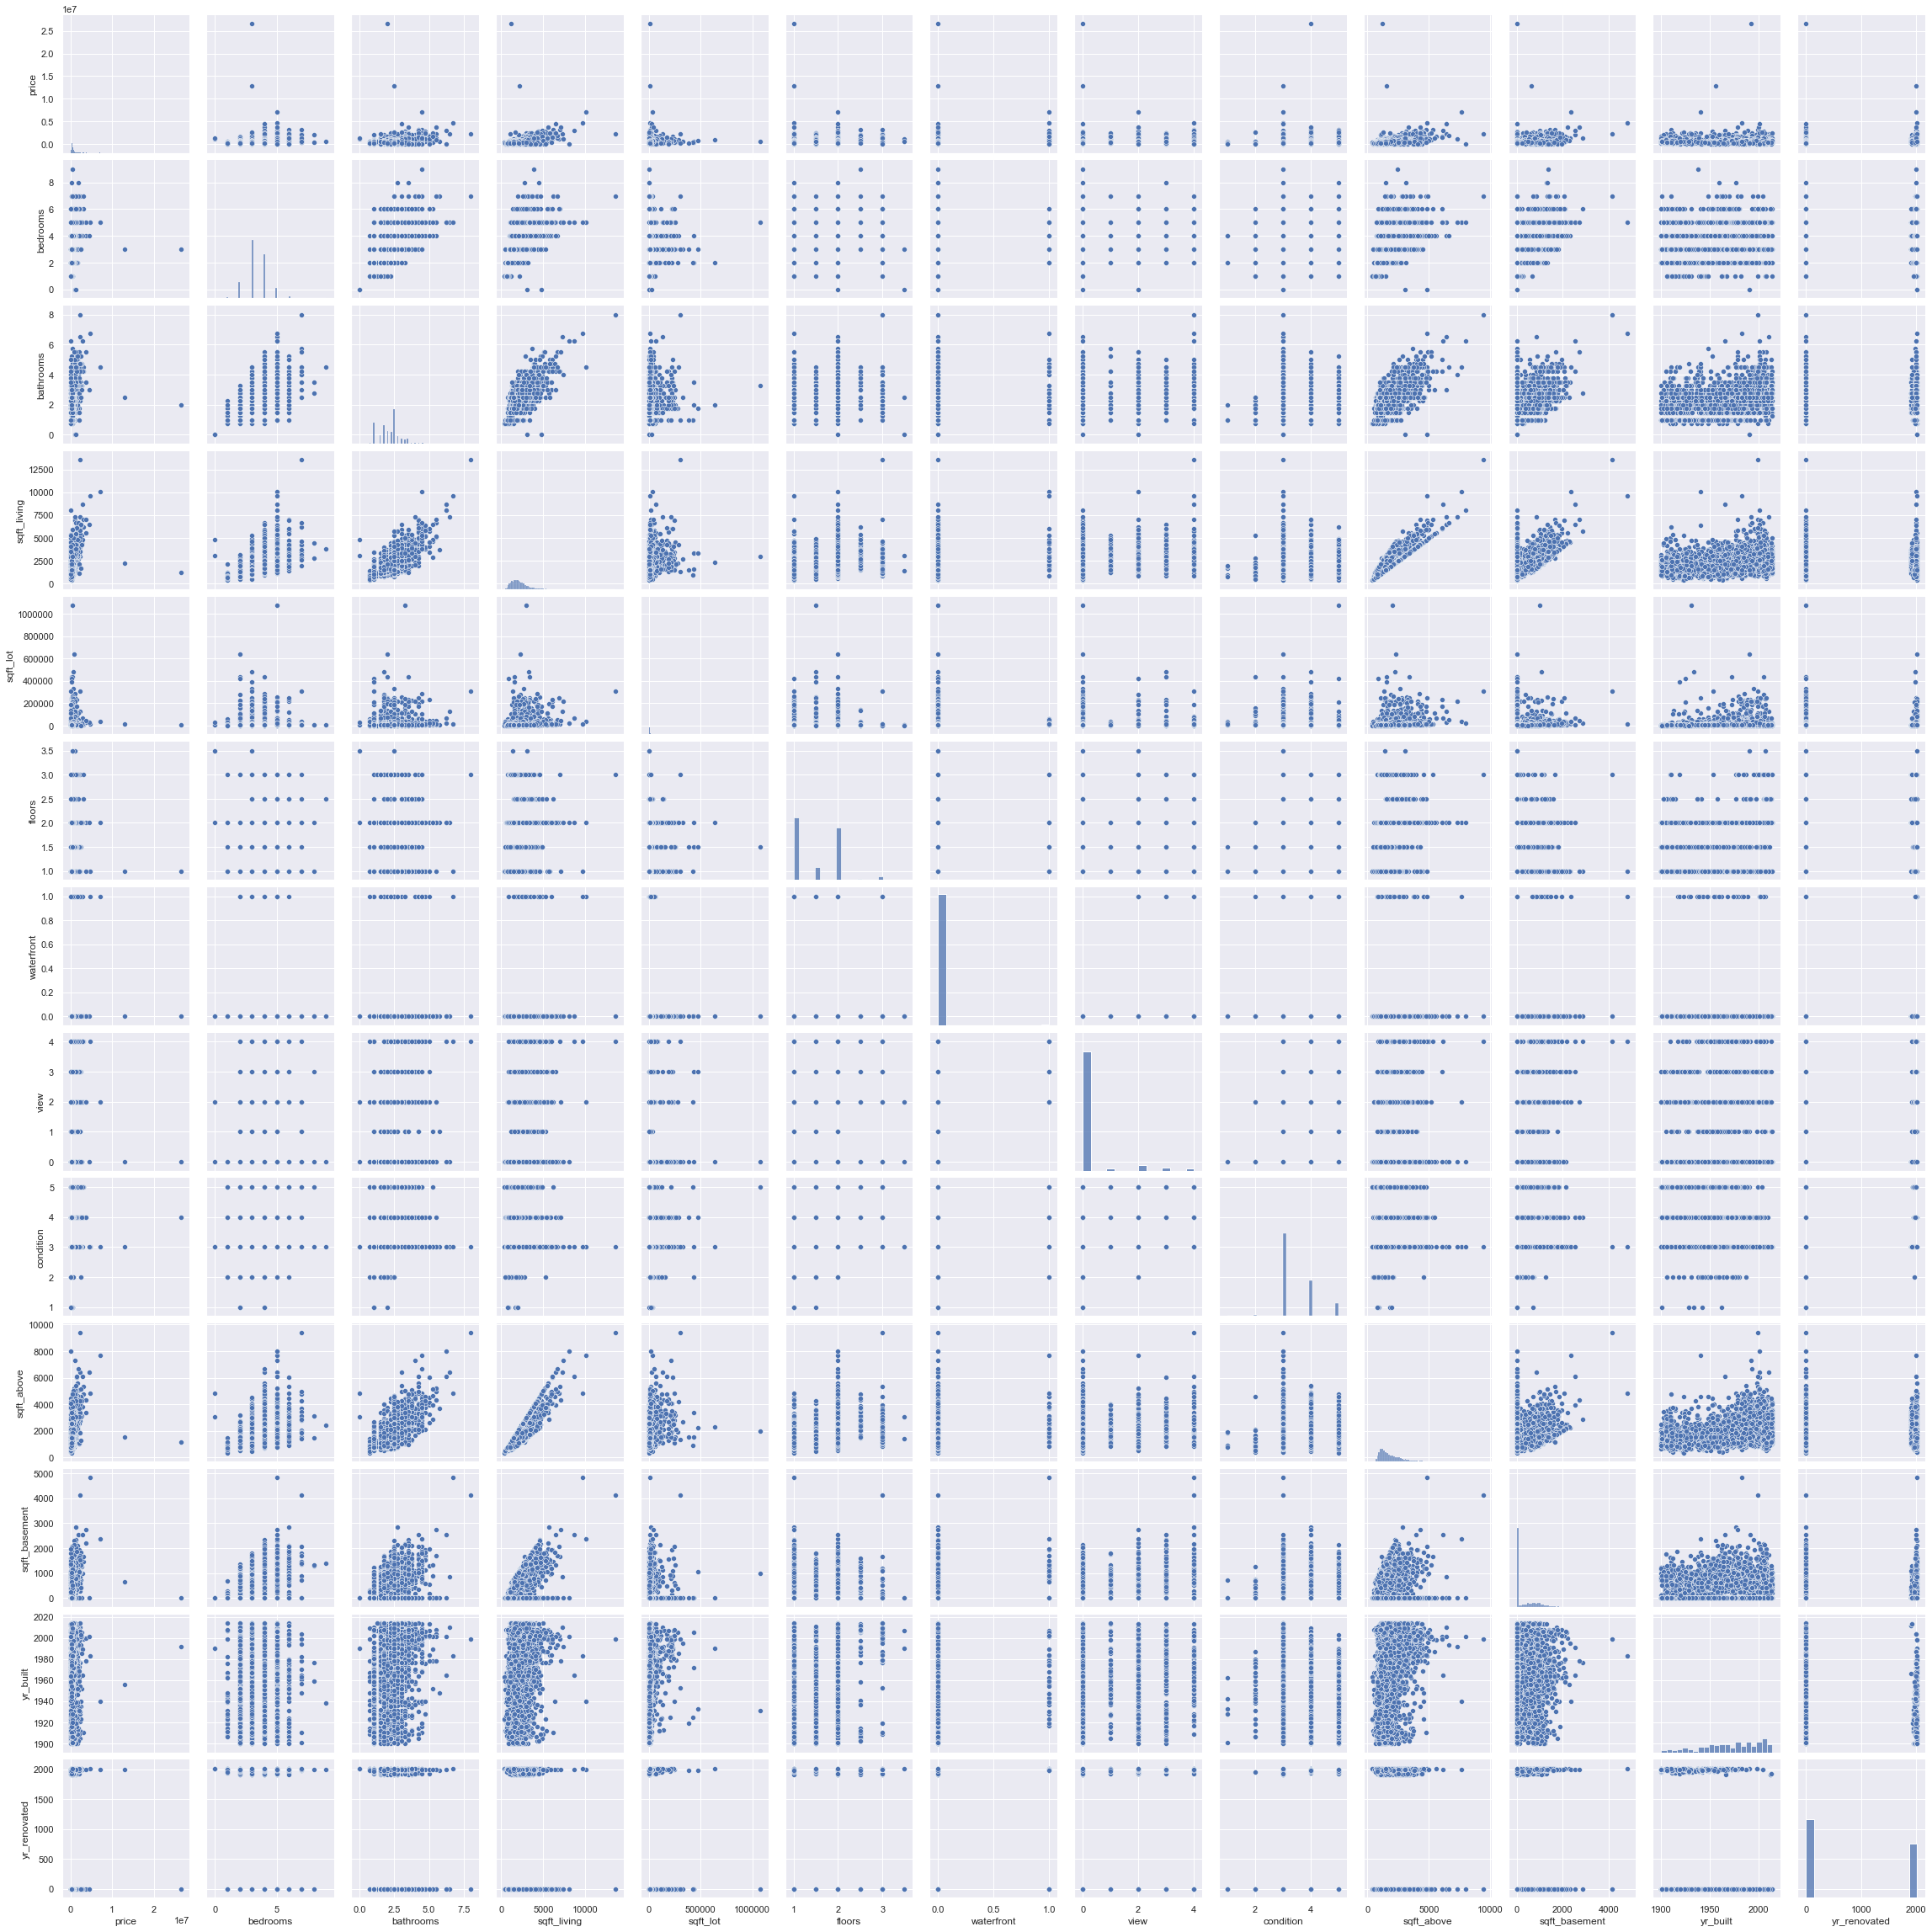

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#### Dropping some clumns we might not need

In [10]:
df.drop(['date'],axis = 1,inplace=True)
df.drop(['street'],axis = 1,inplace=True)
df.drop(['country'],axis = 1,inplace=True)

In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [12]:
# Create a list of numerical features
num_vars = ['bedrooms', 'bathrooms', 'floors', 'sqft_above']

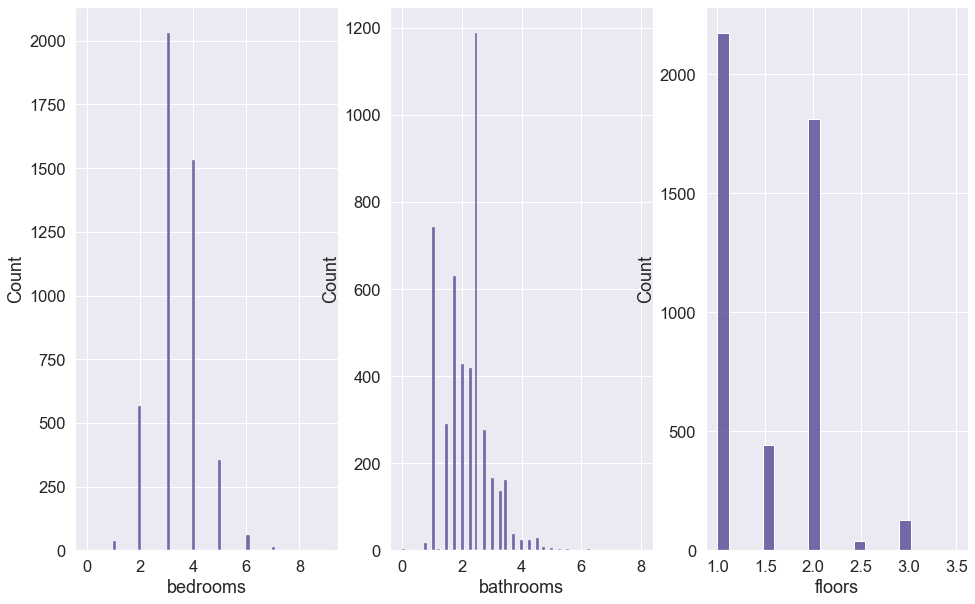

In [13]:
# Create histograms to show count of numerical features
sns.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
#fig.subplots_adjust(hspace=0.2, wspace=0.3)
sns.set_theme(style='whitegrid')
for var, ax in zip(num_vars, axes.flatten()):
    sns.histplot(data=df, x=var, ax=ax, color='darkslateblue')

In [14]:
def sp(dat, dep, X,Y):
    for i, z in enumerate(dat):
        plt.figure(figsize = (X,Y))
        #plt.subplot(6,2, i+1)
        sns.scatterplot(x = df[z], y = df[dep], color = 'blue')
        

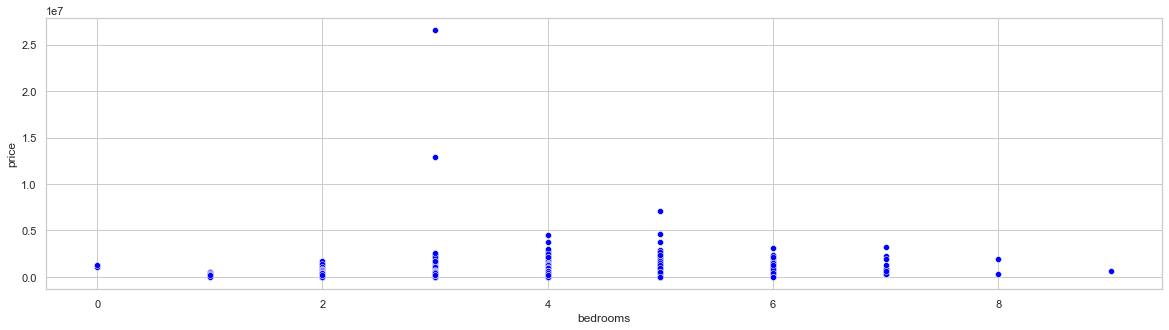

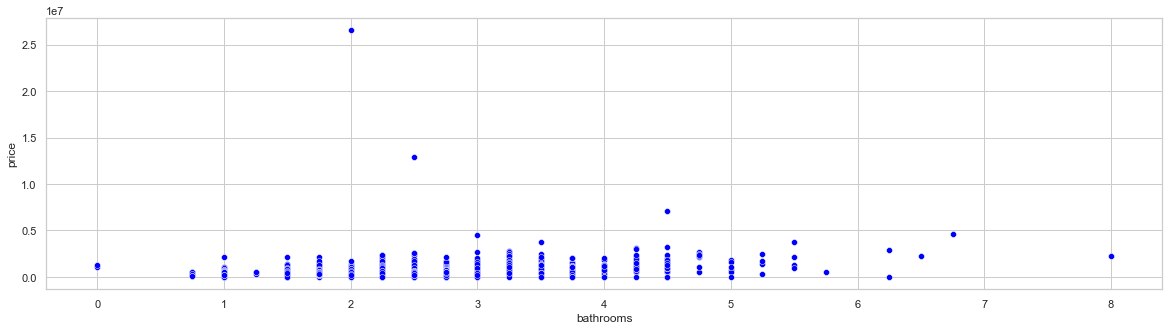

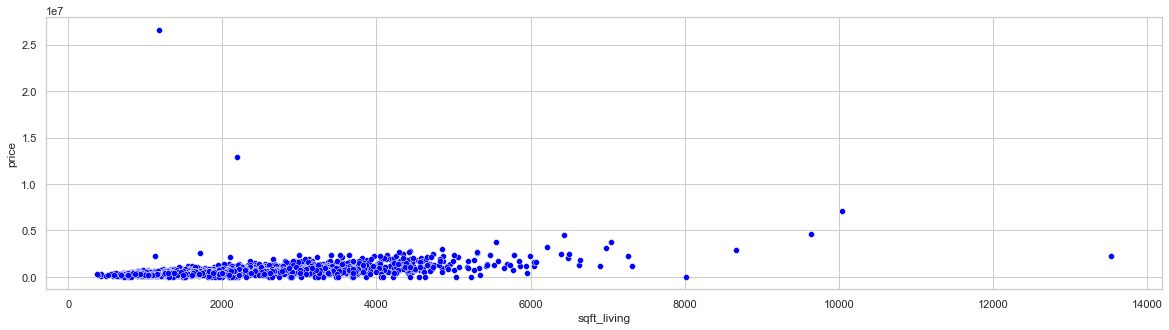

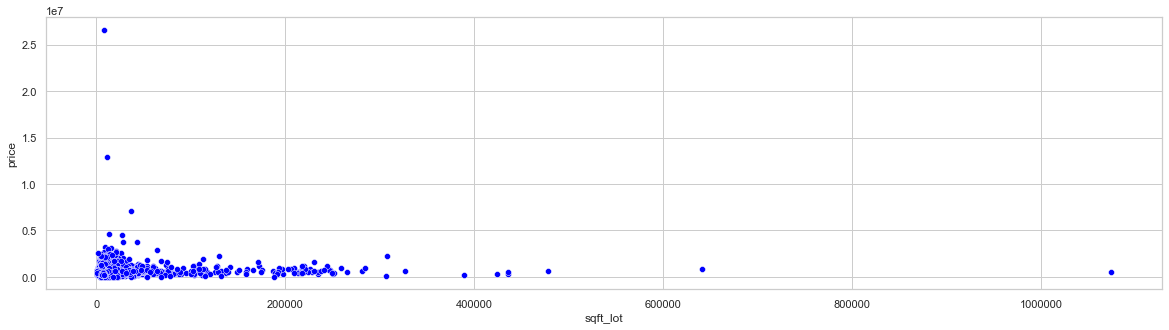

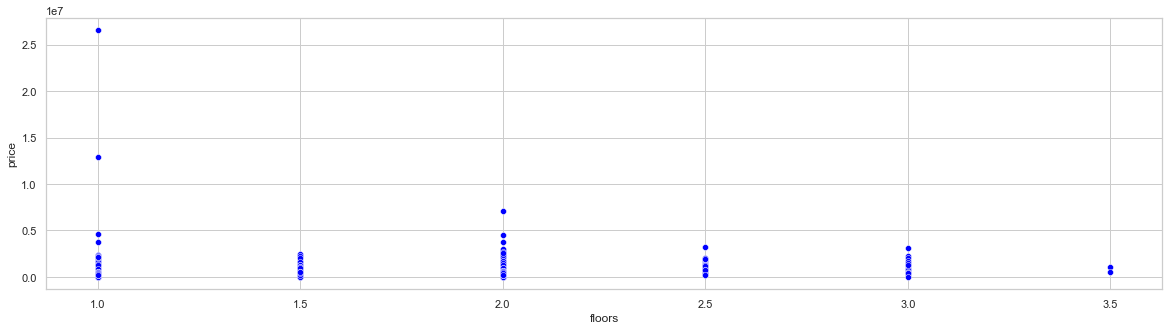

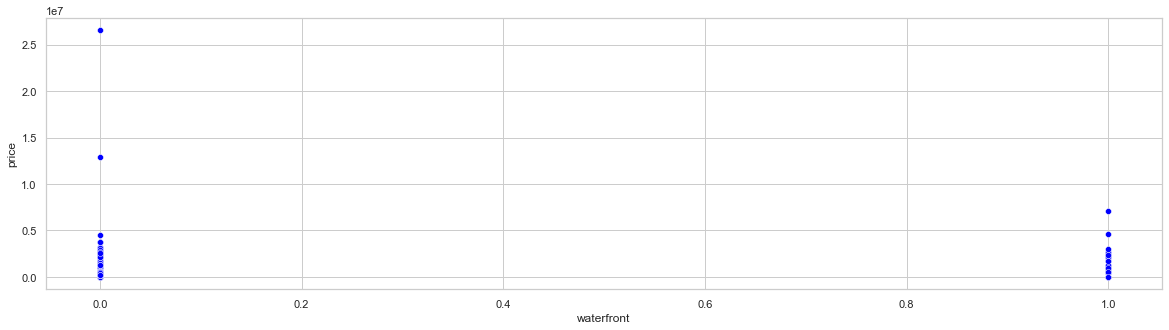

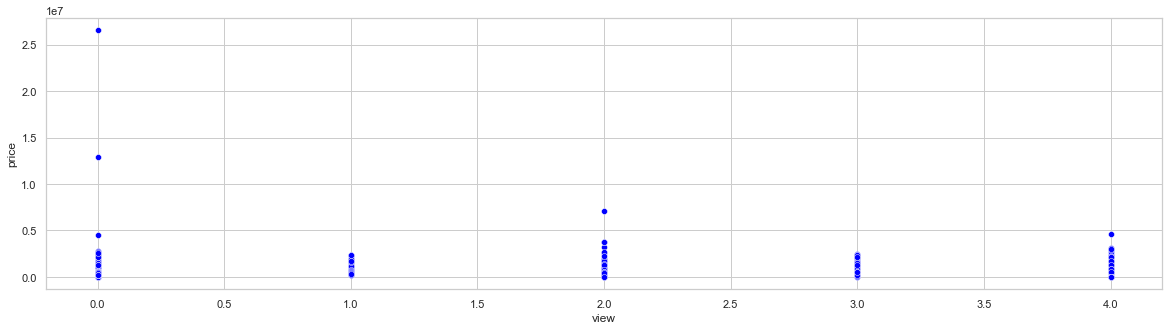

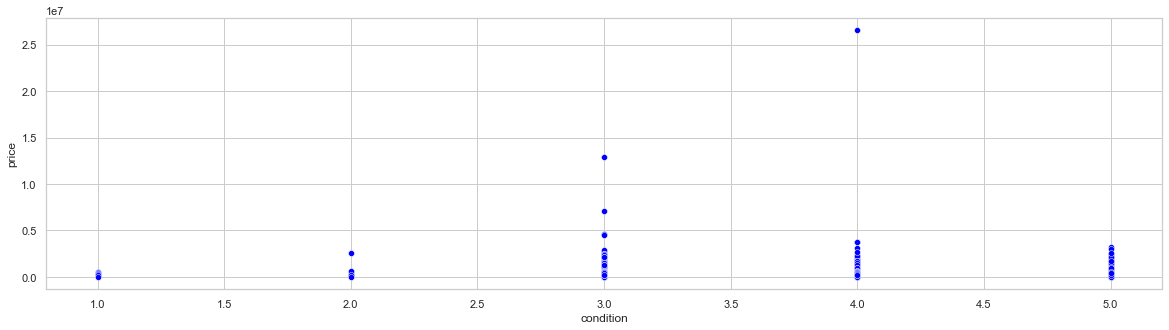

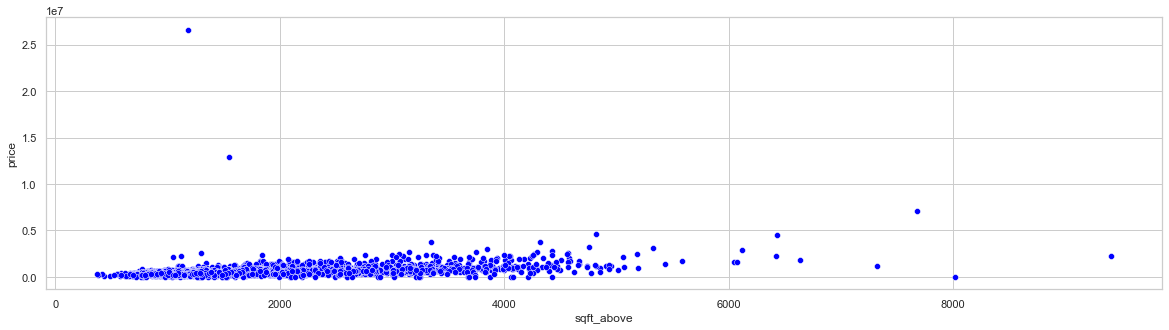

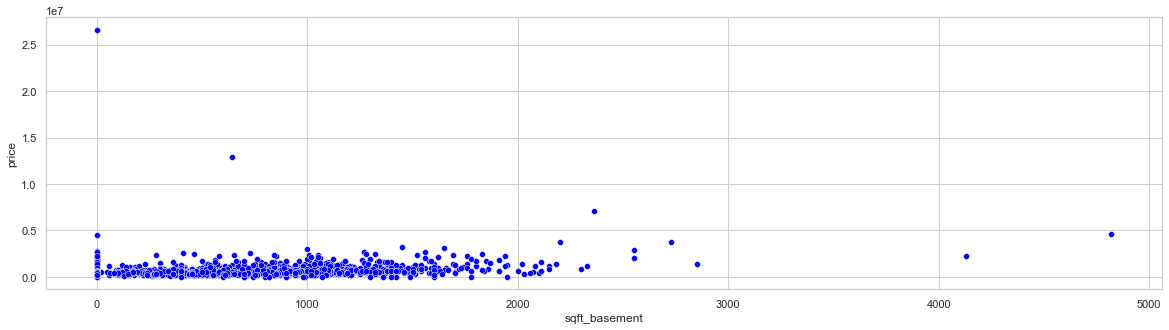

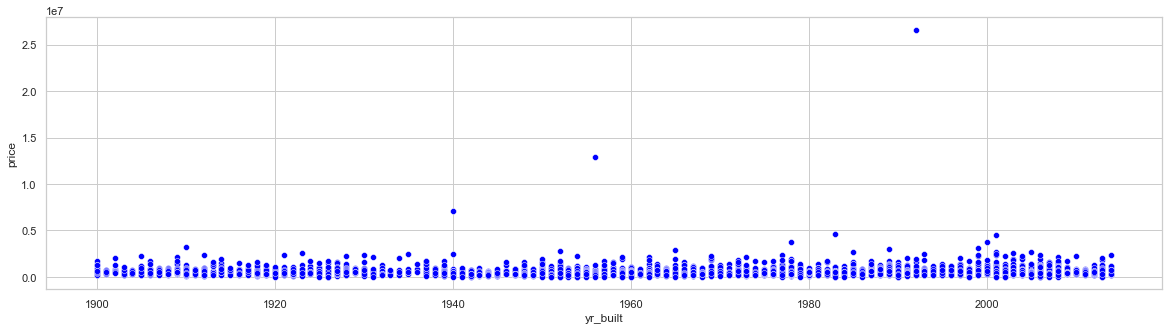

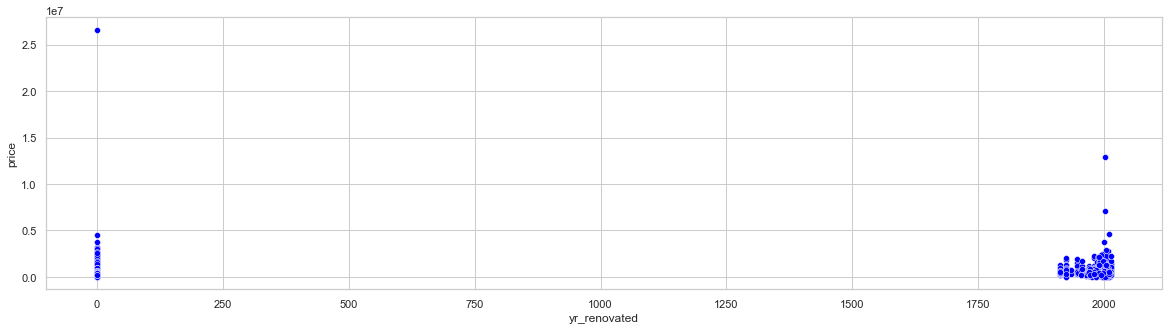

In [15]:
#Visualizing price w.r to all the other variables in the form of scatterplot

sp(df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']], "price", 20, 5)

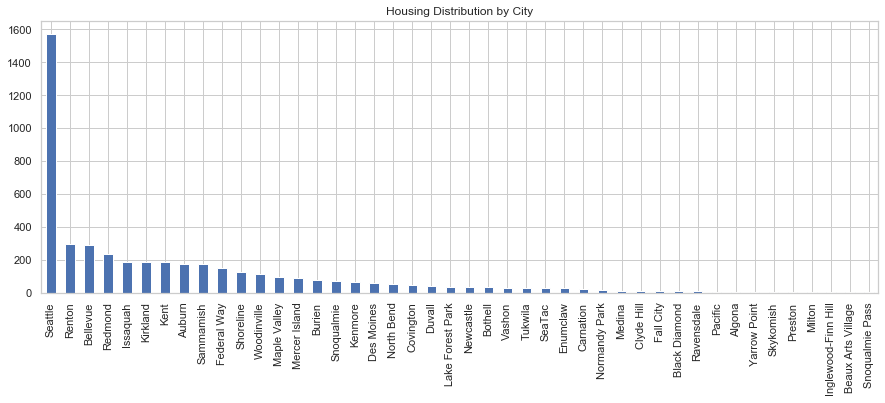

In [16]:
#looking at the distribution by city
plt.figure(figsize=(15,5))
df.city.value_counts().plot.bar()
plt.title('Housing Distribution by City')
plt.show()

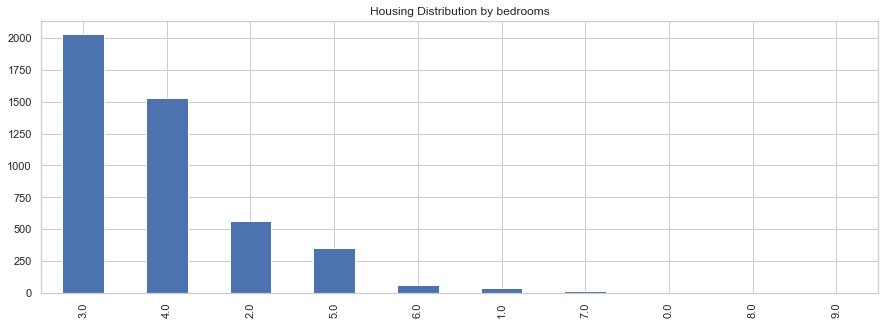

In [17]:
#looking at the distribution by city
plt.figure(figsize=(15,5))
df.bedrooms.value_counts().plot.bar()
plt.title('Housing Distribution by bedrooms')
plt.show()

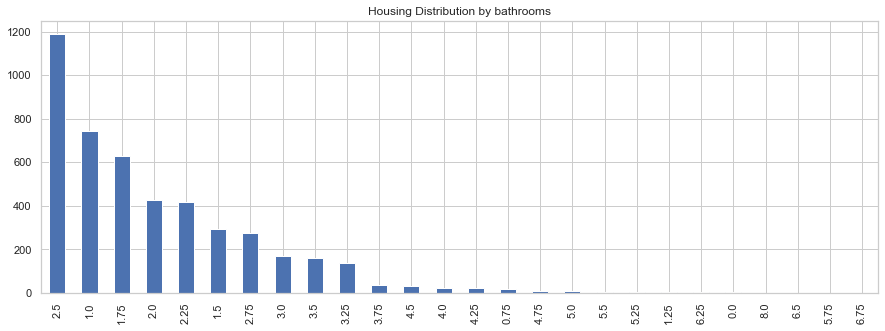

In [18]:
#looking at the distribution by city
plt.figure(figsize=(15,5))
df.bathrooms.value_counts().plot.bar()
plt.title('Housing Distribution by bathrooms')
plt.show()

#### We cn see that Seattle has the highest count of houses, making it the most popular city in the dataset to buy a house

In [19]:
scatters = df.drop(['waterfront','view', 'condition', 'price'], axis=1).columns

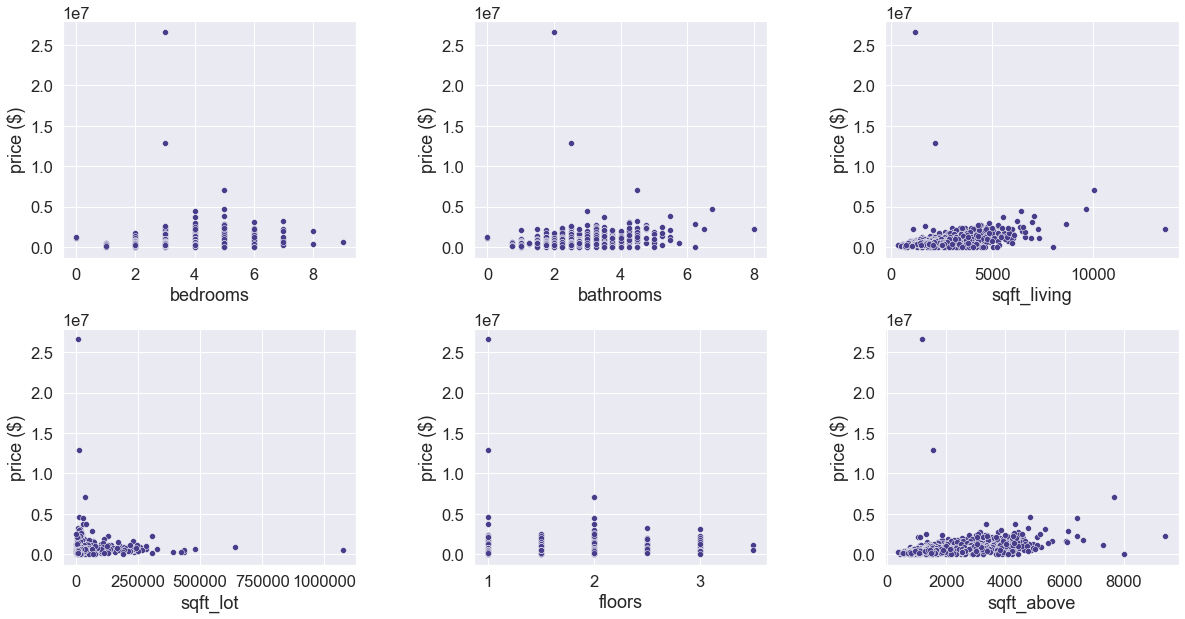

In [20]:
sns.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
sns.set_style(style='whitegrid')
for var, ax in zip(scatters, axes.flatten()):
    sns.scatterplot(x=var, y='price', data=df, ax=ax, color='darkslateblue')
    ax.set(ylabel='price ($)')

##### Taking a closer look at some factors

In [21]:
closer1 = ['bedrooms', 'bathrooms']
closer2 = ['sqft_lot', 'sqft_living']

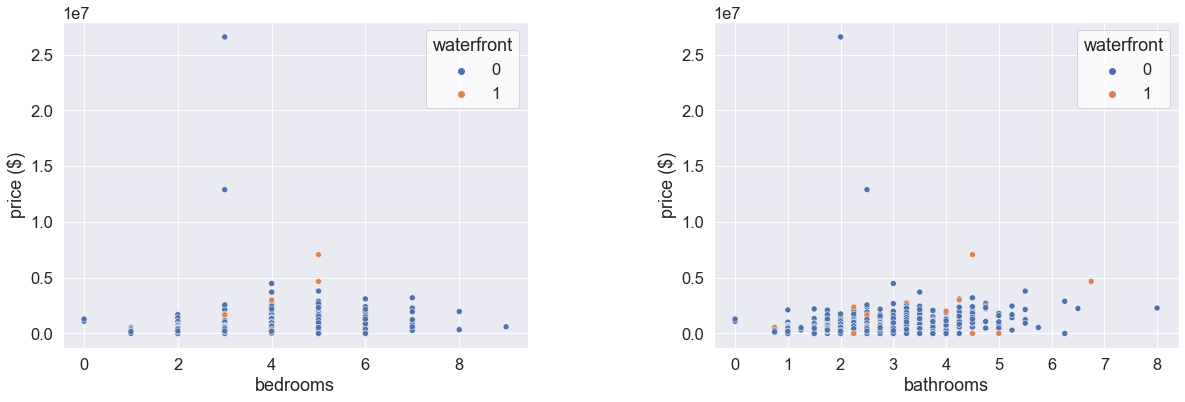

In [22]:
sns.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
sns.set_style(style='whitegrid')
for var, ax in zip(closer1, axes.flatten()):
    sns.scatterplot(x=var, y='price', hue = 'waterfront', data=df, ax=ax)#, color='darkslateblue')
    ax.set(ylabel='price ($)')

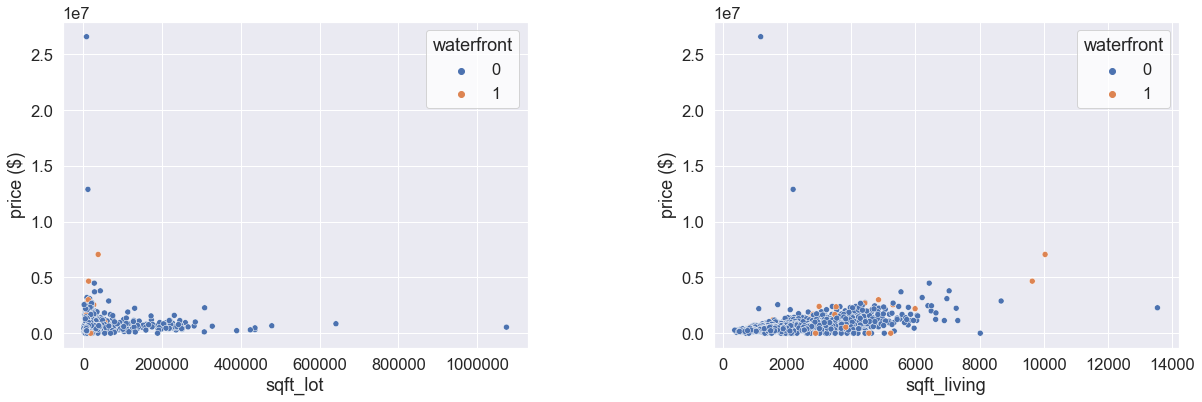

In [23]:
sns.set(font_scale=1.5)
#plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
sns.set_style(style='whitegrid')
for var, ax in zip(closer2, axes.flatten()):
    sns.scatterplot(x=var, y='price', hue = 'waterfront', data=df, ax=ax)#, color='darkslateblue')
    ax.set(ylabel='price ($)')

##### Taking an even closer look at bedrooms

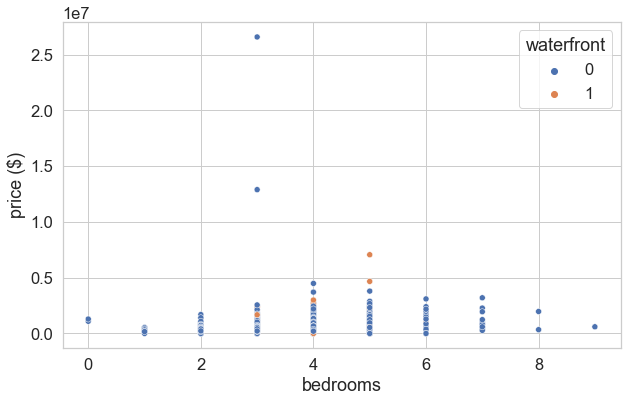

In [24]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,6))
sns.set_style(style='whitegrid')
ax = sns.scatterplot(x='bedrooms', y='price', hue = 'waterfront', data=df)
ax.set(xlabel='bedrooms', ylabel='price ($)')
plt.show()

#### Splitting into training and testing sets

In [25]:
x = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','sqft_above','sqft_basement','waterfront']]
y = df['price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=11)

x_val, x_test, y_val, y_test = train_test_split(x_test, 
                                                  y_test, 
                                                  train_size=0.5, 
                                                  random_state=11)

In [54]:
x.shape

(4600, 10)

In [29]:
x_test.shape

(1150, 10)

In [30]:
x_train.shape

(2300, 10)

Feature: bedrooms - Score: 0.01
Feature: bathrooms - Score: 0.219
Feature: sqft_living - Score: 0.189
Feature: sqft_lot - Score: 0.039
Feature: floors - Score: 0.003
Feature: view - Score: 0.011
Feature: condition - Score: 0.343
Feature: sqft_above - Score: 0.155
Feature: sqft_basement - Score: 0.013
Feature: waterfront - Score: 0.019


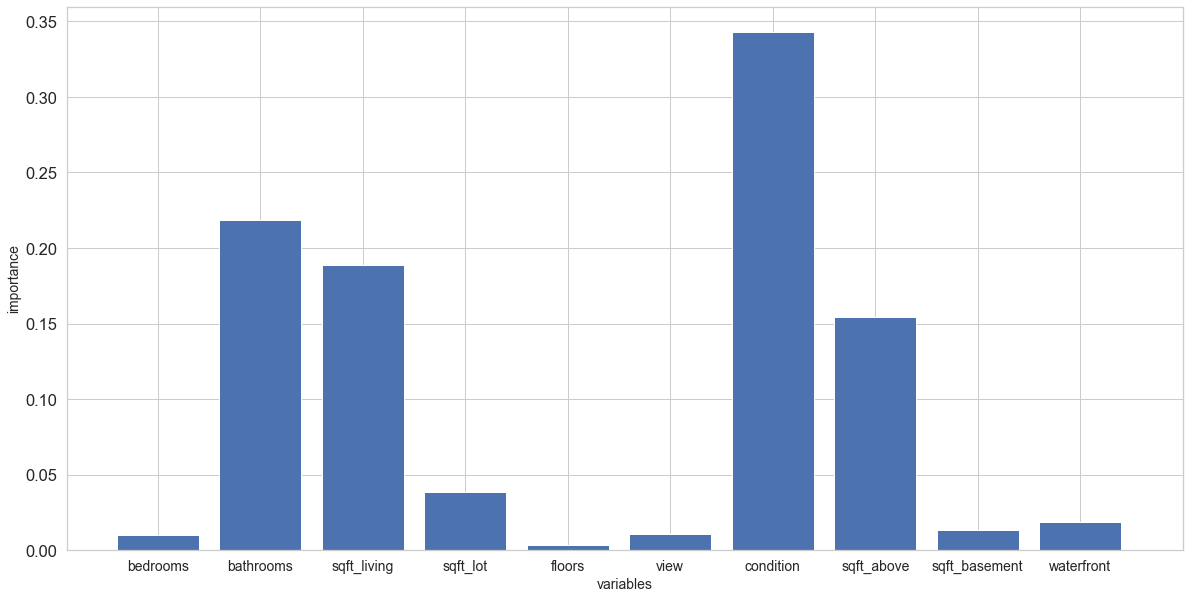

In [31]:
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {} - Score: {}'.format(x_train.columns[i],round(v,3)))
# plot feature importance
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=np.arange(11), labels=x_train.columns, size=14)
plt.xlabel('variables', size=14)
plt.ylabel('importance', size=14)
plt.show()

#### From this, we can see the most important features here would be the sqft_living, sqft_lot, sqft_above, bathrooms and bedrooms, so we will use them for our regression.

In [32]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above','view','waterfront']

In [52]:
# Training and testing using Linear Regression Model
lr = LinearRegression().fit(x_train[features], y_train)
lr_y_pred = lr.predict(x[features])
print('Mean Absolute Error:', round(mean_absolute_error(y, lr_y_pred), 2))
print('R2:', round(r2_score(y, lr_y_pred), 3))

Mean Absolute Error: 178615.55
R2: 0.203


In [34]:
pd.set_option('max_colwidth',200)

In [51]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=11)
dt.fit(x_train[features], y_train)

y_pred = dt.predict(x[features])

print('Decision Tree MAE:', round(mean_absolute_error(y, y_pred), 2))
print('Decision Tree R2:', round(r2_score(y, y_pred), 3))

Decision Tree MAE: 57040.73
Decision Tree R2: 0.888


In [53]:
# Random Forest Regression
rf = RandomForestRegressor(random_state=11)
rf.fit(x_train[features], y_train)
y_pred = rf.predict(x[features])

print('Random Forest MAE:', round(mean_absolute_error(y, y_pred), 2))
print('Random Forest R2:', round(r2_score(y, y_pred), 3))

Random Forest MAE: 97692.06
Random Forest R2: 0.774


#### We can see that the Decision Tree Classifier performed the best

#### Next I ran the same regressions without using my feature index

In [55]:
# Training and testing using Linear Regression Model
lr = LinearRegression().fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)
print('Mean Absolute Error:', round(mean_absolute_error(y_test, lr_y_pred), 2))
print('R2:', round(r2_score(y_test, lr_y_pred), 3))

Mean Absolute Error: 160389.57
R2: 0.453


In [56]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=11)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
print('Decision Tree MAE:', round(mean_absolute_error(y_test, y_pred), 2))
print('Decision Tree R2:', round(r2_score(y_test, y_pred), 3))

Decision Tree MAE: 223832.48
Decision Tree R2: -0.309


In [57]:
# Random Forest Regression
rf = RandomForestRegressor(random_state=11)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Random Forest MAE:', round(mean_absolute_error(y_test, y_pred), 2))
print('Random Forest R2:', round(r2_score(y_test, y_pred), 3))

Random Forest MAE: 166445.01
Random Forest R2: 0.272


#### It can be seen that it would be better to use the feature index
#### It can also be seen that the Decision Tree classifier, using the feature index, yielded the best results

In [76]:
##making prediction
dt = DecisionTreeRegressor(random_state=11)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [77]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
2266,899900.0,599950.0
3793,581000.0,700000.0
3182,625000.0,485000.0
1481,681716.0,819900.0
2872,600000.0,560000.0
...,...,...
2460,435000.0,255000.0
3696,882566.0,486000.0
4360,280000.0,465000.0
3543,260000.0,350000.0


In [78]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 229654.86494190522
Mean Squared Error: 152840827549.9325
Root Mean Squared Error: 390948.6252053235


In [79]:
## testing the the model

# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 229654.86 degrees.
Accuracy: -inf %.


C:\Users\osmon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\osmon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


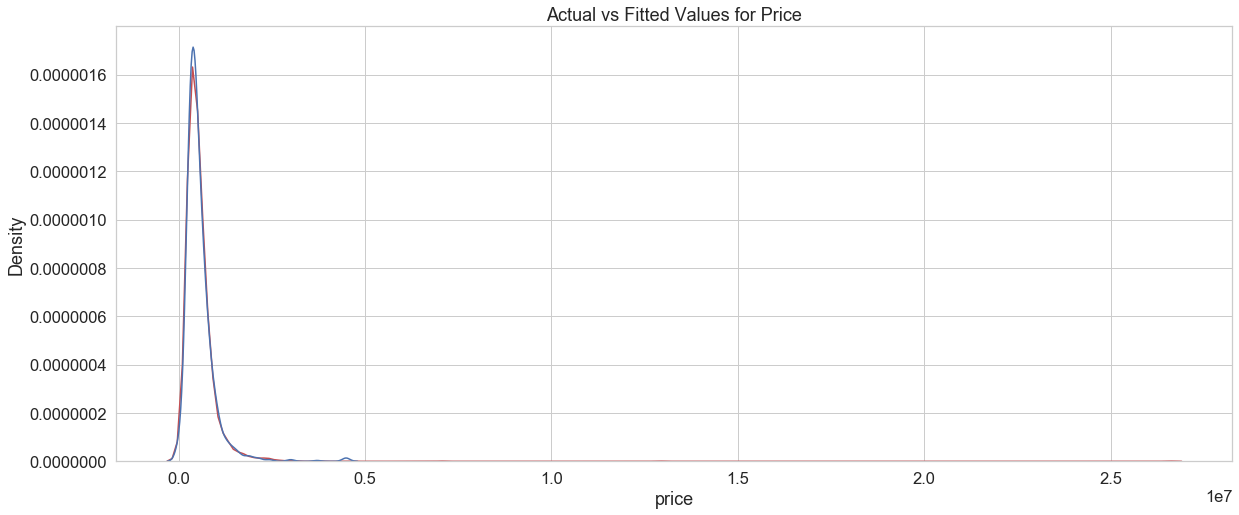

In [80]:
import seaborn as sns
plt.figure(figsize=(20, 8))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()